# Table of Contents
 <p><div class="lev1 toc-item"><a href="#OSMI-Mental-Health-in-Tech-Survey-2016:-Finding-narratives-on-company-treatment" data-toc-modified-id="OSMI-Mental-Health-in-Tech-Survey-2016:-Finding-narratives-on-company-treatment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>OSMI Mental Health in Tech Survey 2016: Finding narratives on company treatment</a></div><div class="lev1 toc-item"><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></div><div class="lev2 toc-item"><a href="#Information-on-roles-in-organization" data-toc-modified-id="Information-on-roles-in-organization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Information on roles in organization</a></div><div class="lev2 toc-item"><a href="#Provisions-for-health-by-the-company" data-toc-modified-id="Provisions-for-health-by-the-company-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Provisions for health by the company</a></div><div class="lev2 toc-item"><a href="#Personal-Interaction-with-employer" data-toc-modified-id="Personal-Interaction-with-employer-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Personal Interaction with employer</a></div><div class="lev2 toc-item"><a href="#Previous-Employment-Information" data-toc-modified-id="Previous-Employment-Information-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Previous Employment Information</a></div>

# OSMI Mental Health in Tech Survey 2016: Finding narratives on company treatment

_By [Michael Rosenberg](mailto:mmrosenb@andrew.cmu.edu)._

_**Description**: Contains my eda for my cluster analysis work on the questions related to how companies deal with the mental health of workers._

In [20]:
#imports

#constants
sigLev = 3
percentMul = 100
buildBarplot <- function(plotVec,distName){
    #helper that builds out our barplots
    counts = table(plotVec)
    #then reorganize counts to not consider empty level
    counts = counts[2:length(counts)]
    barplot(counts,xlab = "Answer",ylab = "Count",col = "Blue",
            main = paste0("Distribution of\n",distName))
}

In [2]:
#load in raw dataset
surveyFrame = read.csv("../../data/raw/osmi-survey-2016_data.csv")

# Exploratory Data Analysis

One of the key issues we will recognize when performing this cluster analysis is that those who are self-employed do not fill out most of this information. Thus, we will likely have to remove a sizable number of individuals from consideration in this analysis.

In [3]:
surveyFrame = surveyFrame[which(surveyFrame$Are.you.self.employed. != 1),]

Because there are around $53$ variables specifically related to the mental health of an employee and how mental health is treated in the workplace, it may be useful to select particularly interesting variables for EDA rather than look at each one individually. This is partially because it wouldn't make sense to try and build barplots for $53$ different variables.

We will look at the modal proportion of our variables as a signal of variance in the distribution of each variable.

In [4]:
dim(surveyFrame)

[1] 1146   63

In [5]:
#get our functions
Mode <- function(x) {
  #gets the mode for a vector
  ux <- unique(x)
  return(ux[which.max(tabulate(match(x, ux)))])
}
getModalProp <- function(givenVec){
    #gets the modal proportion on a given vector
    givenMode = Mode(givenVec)
    numAtMode = 0
    if (is.na(givenMode)){ #need slightly altered calculation
        numAtMode = sum(is.na(givenVec))
    }
    else {
        numAtMode = length(givenVec[which(givenVec == givenMode)])
    }
    propAtMode = numAtMode / length(givenVec)
    return(propAtMode)
}

In [6]:
#get considered variables
firstConsideredVar = 3
lastConsideredVar = 55
consideredVarFrame = surveyFrame[,firstConsideredVar:lastConsideredVar]
modalPropVec = sapply(consideredVarFrame,getModalProp)
#then order by modalProp
orderProp = order(modalPropVec)
modalPropVec = modalPropVec[orderProp]
modalPropFrame = data.frame("Modal Proportion" = modalPropVec)
modalPropFrame

,Modal.Proportion
Why.or.why.not..1,0.2172775
Why.or.why.not.,0.2390925
If.a.mental.health.issue.prompted.you.to.request.a.medical.leave.from.work..asking.for.that.leave.would.be.,0.2452007
Have.your.previous.employers.provided.mental.health.benefits.,0.2844677
Do.you.know.the.options.for.mental.health.care.available.under.your.employer.provided.coverage.,0.3089005
Did.you.feel.that.your.previous.employers.took.mental.health.as.seriously.as.physical.health.,0.3176265
If.you.have.a.mental.health.issue..do.you.feel.that.it.interferes.with.your.work.when.NOT.being.treated.effectively.,0.3682373
Would.you.feel.comfortable.discussing.a.mental.health.disorder.with.your.direct.supervisor.s..,0.3734729
Do.you.currently.have.a.mental.health.disorder.,0.3935428
If.you.have.a.mental.health.issue..do.you.feel.that.it.interferes.with.your.work.when.being.treated.effectively.,0.3970332


_Table 1: Variables order by modal proportion._

## Information on roles in organization

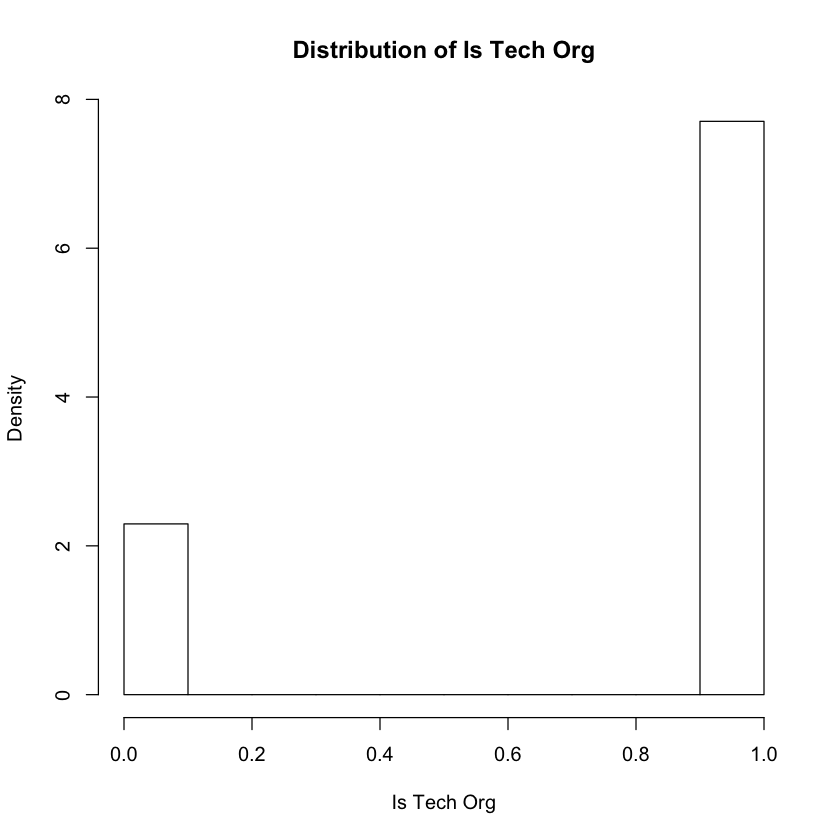

In [7]:
hist(surveyFrame$Is.your.employer.primarily.a.tech.company.organization.,
     freq = FALSE,xlab = "Is Tech Org",main = "Distribution of Is Tech Org")

_Figure 1: Distribution of if the employer is a tech organization._

We see that most individuals primarily work at tech organizations. This is expected given the nature of the survey.

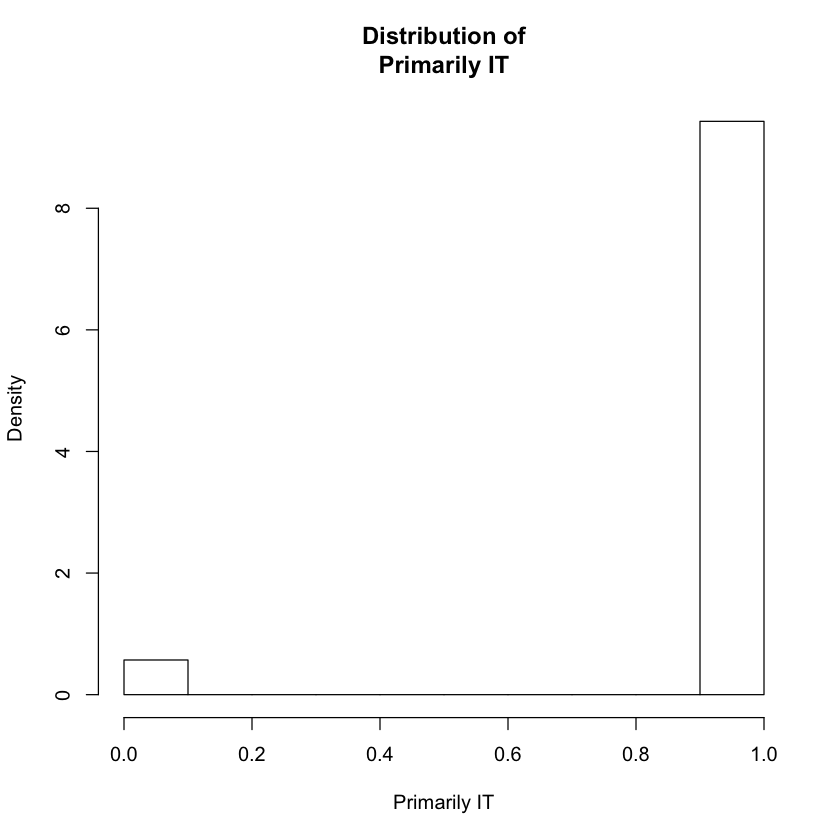

In [8]:
hist(surveyFrame$Is.your.primary.role.within.your.company.related.to.tech.IT.,
     freq = FALSE,xlab = "Primarily IT",main = "Distribution of\nPrimarily IT")

_Figure 2: Distribution of whether or not the individual is primarily IT._

## Provisions for health by the company

pdf 
  2

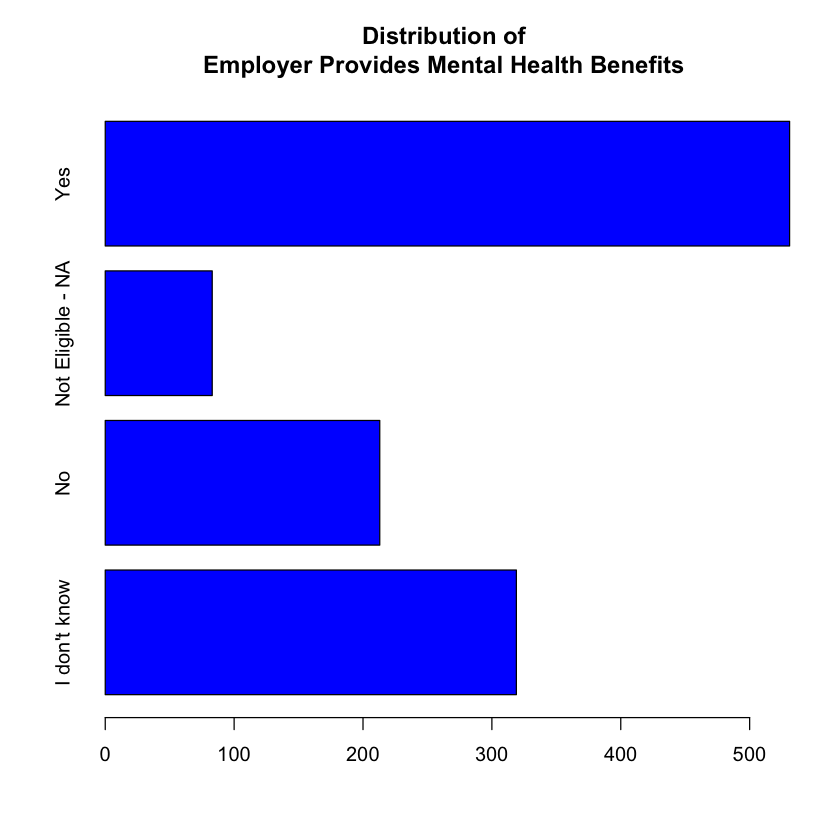

In [9]:
provideCounts = table(surveyFrame$Does.your.employer.provide.mental.health.benefits.as.part.of.healthcare.coverage.)
#get rid of nulls
provideCounts = provideCounts[2:length(provideCounts)]
#save figure
png("../../reports/secondBlogPost/figures/figure1.png",width = 6,
    height = 6,units = "in",res = 400)
barplot(provideCounts,horiz = TRUE,axisnames = TRUE,col = "Blue",
        names.arg = c("I don't know","No","Not Eligible - NA","Yes"),
        main = "Distribution of\nEmployer Provides Mental Health Benefits",
        xlab = "Count",ylab = "Answer")
dev.off()
#then plot
barplot(provideCounts,horiz = TRUE,axisnames = TRUE,col = "Blue",
        names.arg = c("I don't know","No","Not Eligible - NA","Yes"),
        main = "Distribution of\nEmployer Provides Mental Health Benefits")

_Figure 3: Distribution of whether or not an employer provides mental health benefits as part of health coverage._

We see some slightly disturbing qualities to this distributi. In particular, we recognize that over $200$ of the responses state that their employer gives them no mental health benefits in their coverage. Given that this is about {{signif(provideCounts["No"] / sum(provideCounts),sigLev) * percentMul}} of the distribution of people who responded, We are seeing that close to a fifth of employers aren't providing coverage for mental health. The large number of individuals who responded "I don't know" is likely just an effect of how well-informed individuals are about their coverage.

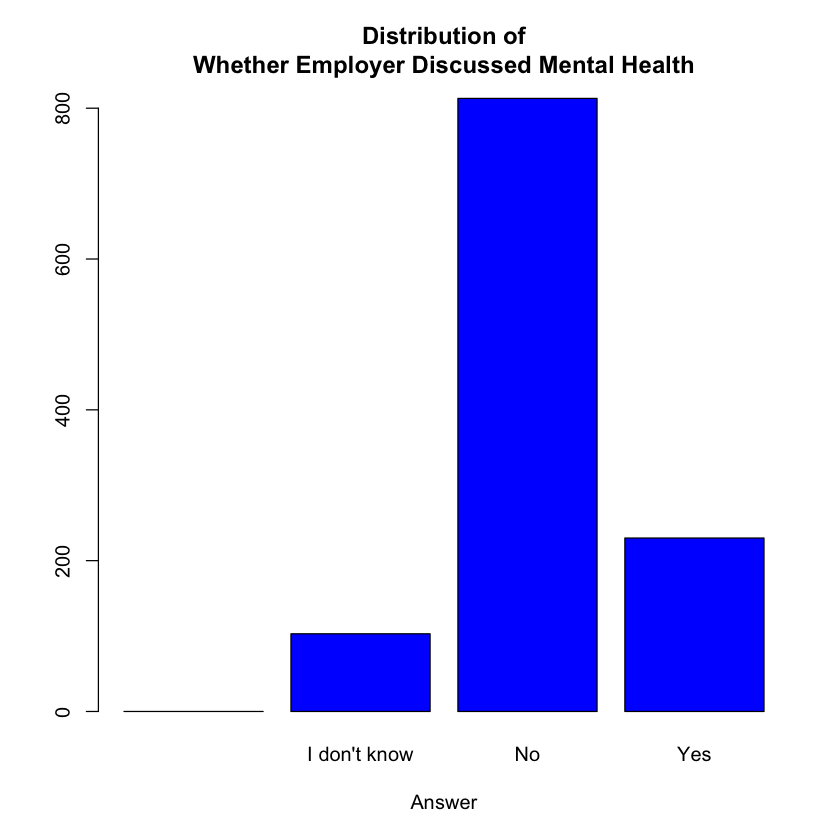

In [10]:
notedResourceCount = table(surveyFrame$Has.your.employer.ever.formally.discussed.mental.health..for.example..as.part.of.a.wellness.campaign.or.other.official.communication..)
barplot(notedResourceCount,xlab = "Answer",col = "Blue",
        main = "Distribution of\nWhether Employer Discussed Mental Health")

_Figure 4: Distribution of answers to the question "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_

Most people have not had their employer formally discuss mental health with them. It would be interesting to see if this informs the number of people who don't know about their mental health benefits.


I don't know           No          Yes 
         320          531          295 


Warning message in plot.window(xlim, ylim, log = log, ...):
“"xlabl" is not a graphical parameter”Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“"xlabl" is not a graphical parameter”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"xlabl" is not a graphical parameter”Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
“"xlabl" is not a graphical parameter”

pdf 
  2

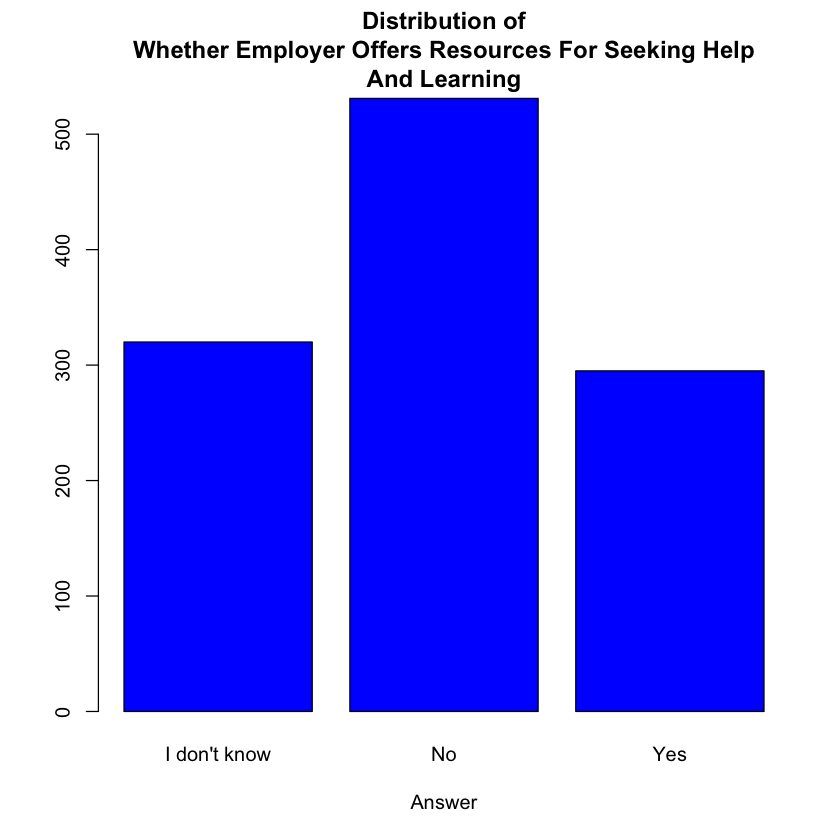

In [14]:
offerResource = table(surveyFrame$Does.your.employer.offer.resources.to.learn.more.about.mental.health.concerns.and.options.for.seeking.help.)
print(offerResource[2:4])
png("../../reports/secondBlogPost/figures/figure2.png",width = 6,
    height = 6,units = "in",res = 400)
barplot(offerResource[2:4],xlab = "Answer",col = "Blue",
        main = "Distribution of\nWhether Employer Offers Resources For Seeking Help",
        ylab = "Count",xlabl = "Answer")
dev.off()
barplot(offerResource[2:4],xlab = "Answer",col = "Blue",
        main = "Distribution of\nWhether Employer Offers Resources For Seeking Help\nAnd Learning")

 _Figure 5: Distribution of answers to the question "Does your employer offer resources to learn more about mental health concerns and options for seeking help?" ._


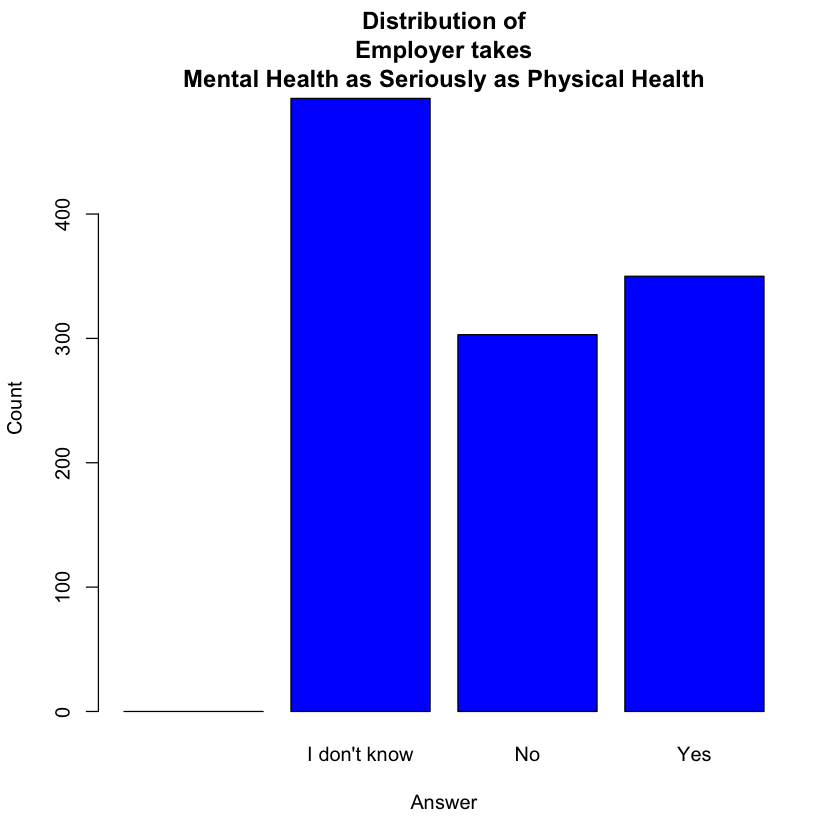

In [15]:
buildBarplot(surveyFrame$Do.you.feel.that.your.employer.takes.mental.health.as.seriously.as.physical.health.,
             "Employer takes\nMental Health as Seriously as Physical Health")

_Figure 6: Distribution of answers to the question "Do you feel that your employer takes mental health as seriously as physical health?"_

## Personal Interaction with employer

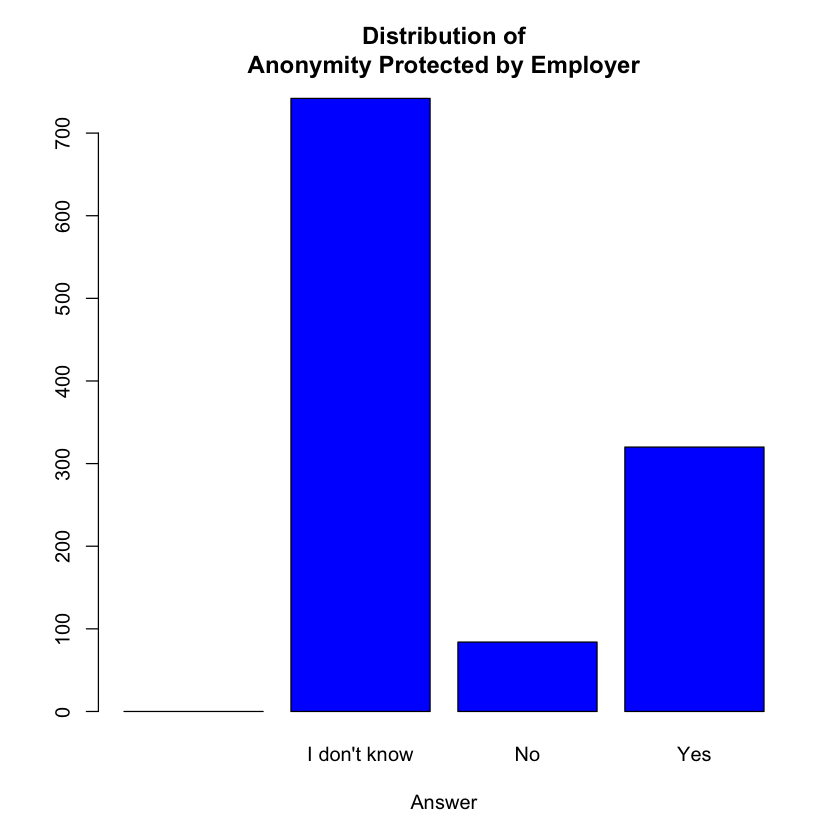

In [16]:
anonCounts = table(surveyFrame$Is.your.anonymity.protected.if.you.choose.to.take.advantage.of.mental.health.or.substance.abuse.treatment.resources.provided.by.your.employer.)
barplot(anonCounts,col = "Blue",xlab = "Answer",
        main = "Distribution of\nAnonymity Protected by Employer")

_Figure 6: Distribution of answers to the question "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?" ._

It is apparent that most individuals do not know if their anonymity is protected in this context. It is liekly that they will only experience this anonymity when the issues is brought up to management.


                                         I don't know 
                         0                        150 
Neither easy nor difficult         Somewhat difficult 
                       178                        199 
             Somewhat easy             Very difficult 
                       281                        118 
                 Very easy 
                       220 


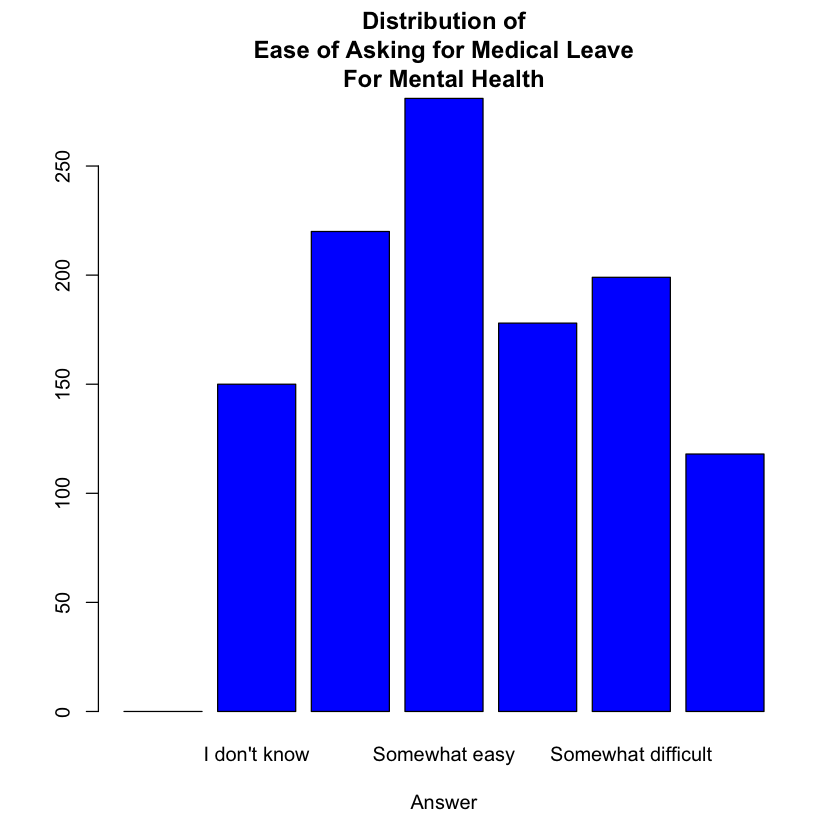

In [18]:
askingLeaveForMentalHealth = table(surveyFrame$If.a.mental.health.issue.prompted.you.to.request.a.medical.leave.from.work..asking.for.that.leave.would.be.)
print(askingLeaveForMentalHealth)
#reorganize
askingLeaveForMentalHealth = askingLeaveForMentalHealth[c(1,2,7,5,3,4,6)]
barplot(askingLeaveForMentalHealth,col = "Blue",xlab = "Answer",
        main = "Distribution of\nEase of Asking for Medical Leave\nFor Mental Health")

_Figure 7: Distribution of answers to the question, "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:" ._

It is apparent that while a good portion of individuals find this situation pretty easy, there is a sizable number of individuals who say this decision is either neutral or very difficult. Let's see how this compares to the one for physical health.

pdf 
  2

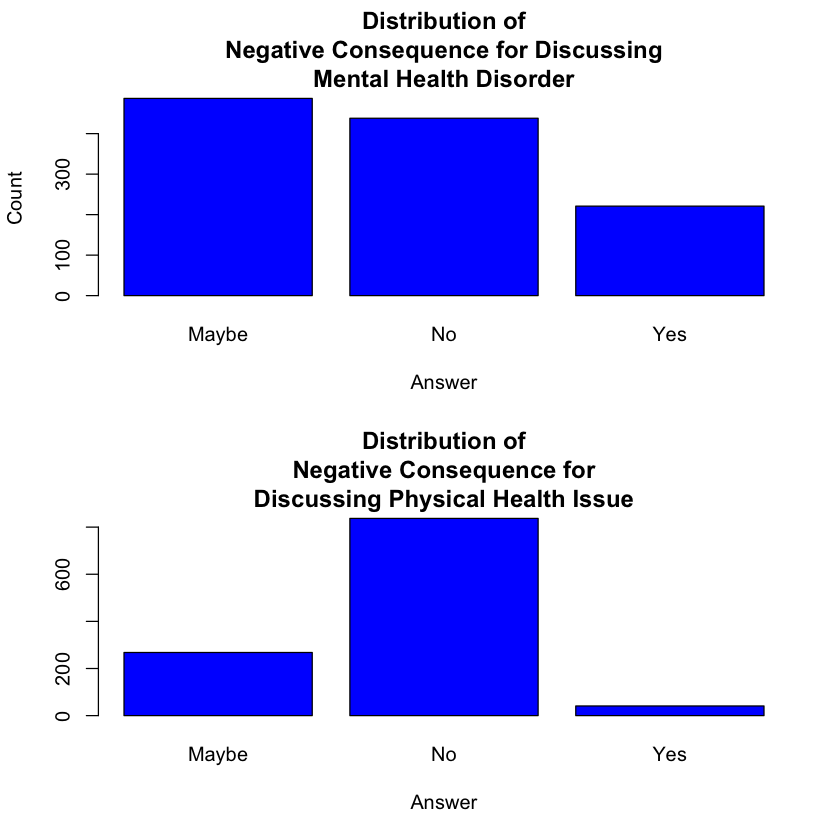

In [19]:
negConsMentalHealth = table(surveyFrame$Do.you.think.that.discussing.a.mental.health.disorder.with.your.employer.would.have.negative.consequences.)
negConsPhysHealth = table(surveyFrame$Do.you.think.that.discussing.a.physical.health.issue.with.your.employer.would.have.negative.consequences.)
#make area for both
png("../../reports/secondBlogPost/figures/figure3.png",width = 6,height = 6,
    units = "in",res = 400)
barplot(negConsMentalHealth[2:4],xlab = "Answer",col = "Blue",
        main = "Distribution of\nNegative Consequence for Discussing\nMental Health Disorder",
        ylab = "Count")
dev.off()
par(mfrow = c(2,1))
barplot(negConsMentalHealth[2:4],xlab = "Answer",col = "Blue",
        main = "Distribution of\nNegative Consequence for Discussing\nMental Health Disorder",
        ylab = "Count")
barplot(negConsPhysHealth[2:4],xlab = "Answer",col = "Blue",
        main = "Distribution of\nNegative Consequence for\nDiscussing Physical Health Issue")

_Figure 8: Distributions for the question "Do you think that discussing a mental health disorder with your employer would have negative consequences?" (top) and for the question "Do you think that discussing a physical health issue with your employer would have negative consequences?" (bottom)._

A very interesting dichotomy begins to appear. In particular, It seems like more people are very sure that there would be no negative consequency for discussing a physical health issue with an employer, but there is greater uncertainty surrounding discussing said issues with an employer if it was for mental health. We are already seeing the societal taboos on mental health appear in the data.

pdf 
  2

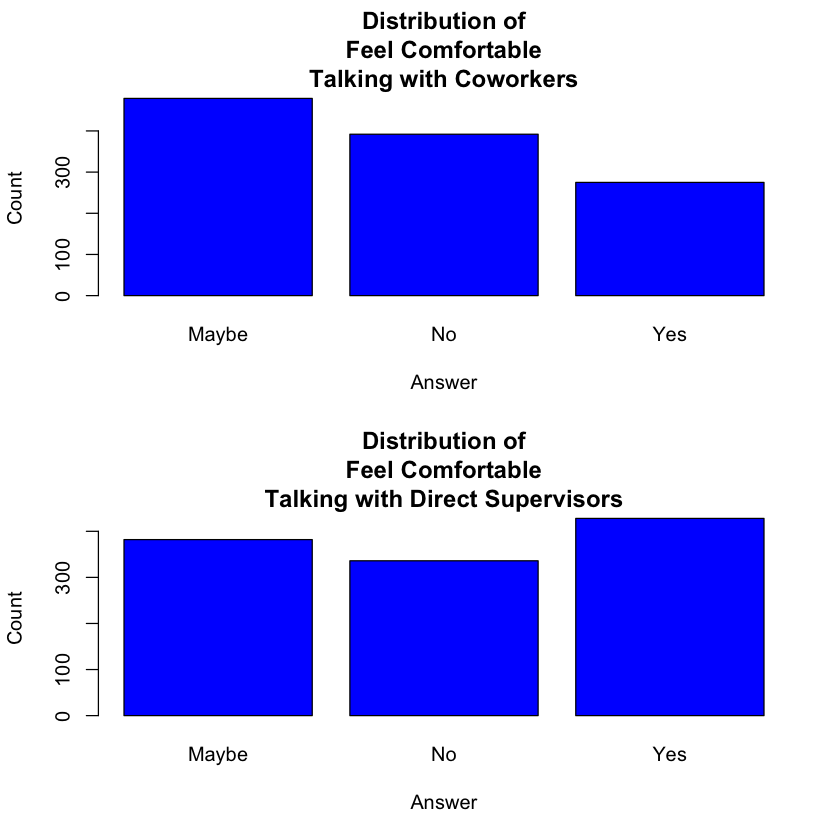

In [21]:
png("../../reports/secondBlogPost/figures/figure4.png",width = 6,height = 6,
    units = "in",res = 400)
buildBarplot(surveyFrame$Would.you.feel.comfortable.discussing.a.mental.health.disorder.with.your.coworkers.,
             "Feel Comfortable\nTalking Mental Health with Coworkers")
dev.off()
par(mfrow = c(2,1))
buildBarplot(surveyFrame$Would.you.feel.comfortable.discussing.a.mental.health.disorder.with.your.coworkers.,
             "Feel Comfortable\nTalking with Coworkers")
buildBarplot(surveyFrame$Would.you.feel.comfortable.discussing.a.mental.health.disorder.with.your.direct.supervisor.s..,
             "Feel Comfortable\nTalking with Direct Supervisors")

_Figure 9: Distribution of Comfort level talking about mental health with particular individuals._

We see that these two distributions look similar on the "Maybe" and "No" side, but we see that more people are comfortable talking about mental health with their direct supervisors than with their coworkers.

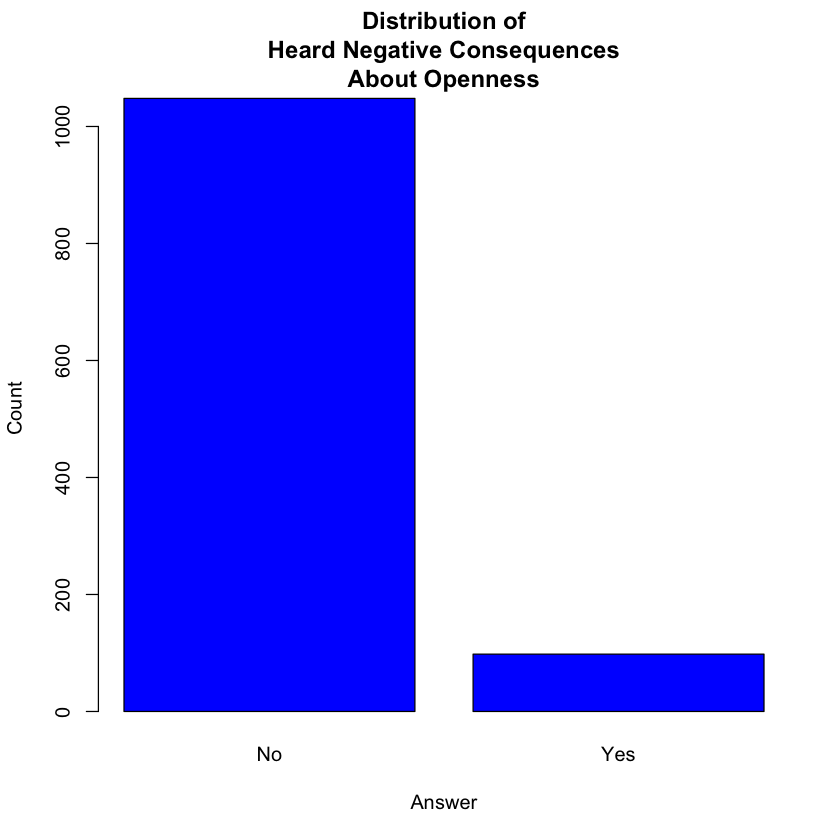

In [22]:
buildBarplot(surveyFrame$Have.you.heard.of.or.observed.negative.consequences.for.co.workers.who.have.been.open.about.mental.health.issues.in.your.workplace.,
             "Heard Negative Consequences\nAbout Openness")

_Figure 10: Distribution of answers to the question "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?" ._

Most people do not hear about negative consequences about these discussions. This is either because these discussions are held as private on consequences, or because they genuinely don't see negative consequences for these discussions.

pdf 
  2

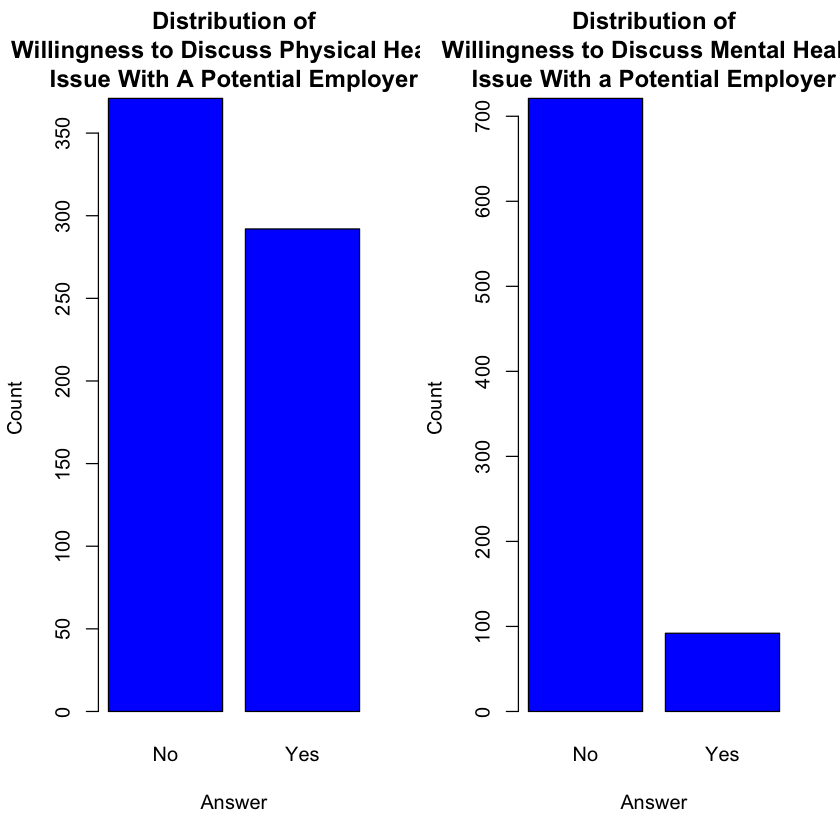

In [23]:
png("../../reports/secondBlogPost/figures/figure5.png",width = 6,height = 6,
    units = "in",res = 400)
buildBarplot(surveyFrame$Would.you.bring.up.a.mental.health.issue.with.a.potential.employer.in.an.interview.,
        "Willingness to Discuss Mental Health\nIssue With a Potential Employer")
dev.off()
par(mfrow = c(1,2))
buildBarplot(surveyFrame$Would.you.be.willing.to.bring.up.a.physical.health.issue.with.a.potential.employer.in.an.interview.,
             "Willingness to Discuss Physical Health\nIssue With A Potential Employer")
buildBarplot(surveyFrame$Would.you.bring.up.a.mental.health.issue.with.a.potential.employer.in.an.interview.,
             "Willingness to Discuss Mental Health\nIssue With a Potential Employer")

_Figure 11: Distribution of whether or not an individual is willing to bring up a physical health issue (left) or a mental health issue (right) with a potential employer during an interview._

It is apparent that the taboos of physical versus mental health appear starkly in these questions. A given respondent is much more willing to admit to a physical health issue with a potential employer than a mental health issue with a potential employer.

There is a ton of potential language data available in the why or why not sections of both of these questions. It may be useful to consider these for our analysis, to at least have a multimodal approach to developing a cluster analysis.

In [24]:
print(surveyFrame$Why.or.why.not.)

   [1]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
   [2] It would depend on the health issue. If there is a health issue that would not immediately affect my job performance, such as diabetes, I would not bring it up during the interview. If it was something more severe, such as narcolepsy, I might bring it up depending on how controlled it was.                                                     


                     Maybe No, I don't think it would 
                       472                        121 
            No, it has not      Yes, I think it would 
                        25                        447 
               Yes, it has 
                        81 


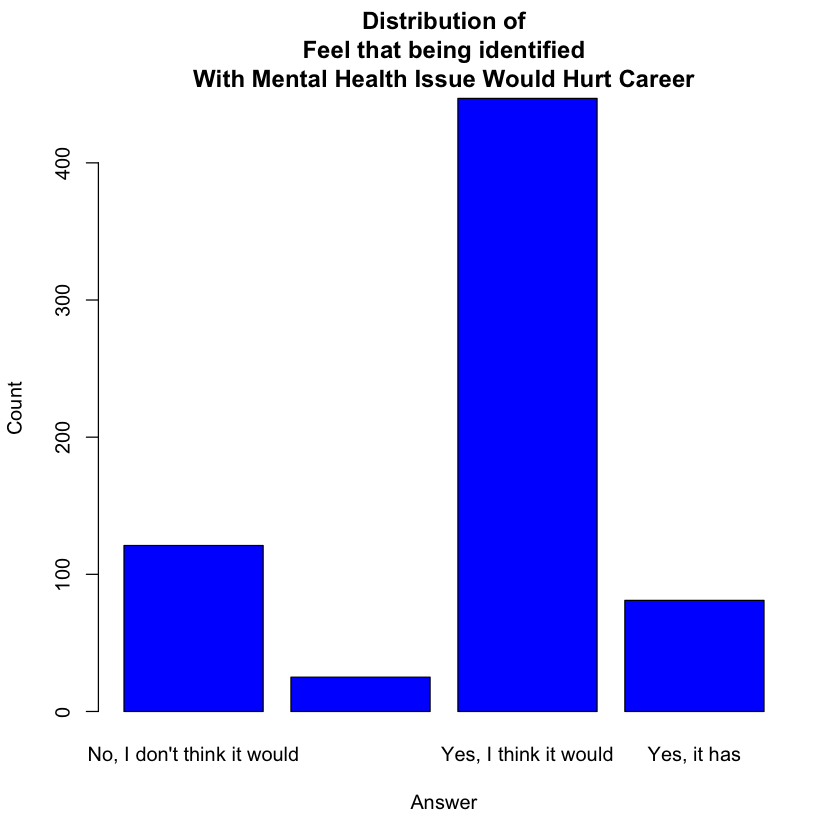

In [25]:
print(table(surveyFrame$Do.you.feel.that.being.identified.as.a.person.with.a.mental.health.issue.would.hurt.your.career.))
buildBarplot(surveyFrame$Do.you.feel.that.being.identified.as.a.person.with.a.mental.health.issue.would.hurt.your.career.,
             "Feel that being identified\nWith Mental Health Issue Would Hurt Career")

_Figure 12: Distribution of answers to the question "Do you feel that being identified as a person with a mental health issue would hurt your career?" ._

There is some noted uncertainty to this question. Most individuals do not claim to have this situation hurt their career. That being said, quite a few people express the likelihood that it would hurt their career or that it only might hurt their career. It is difficult to say whether this hurt comes from the employer-side or the fatigue-side.

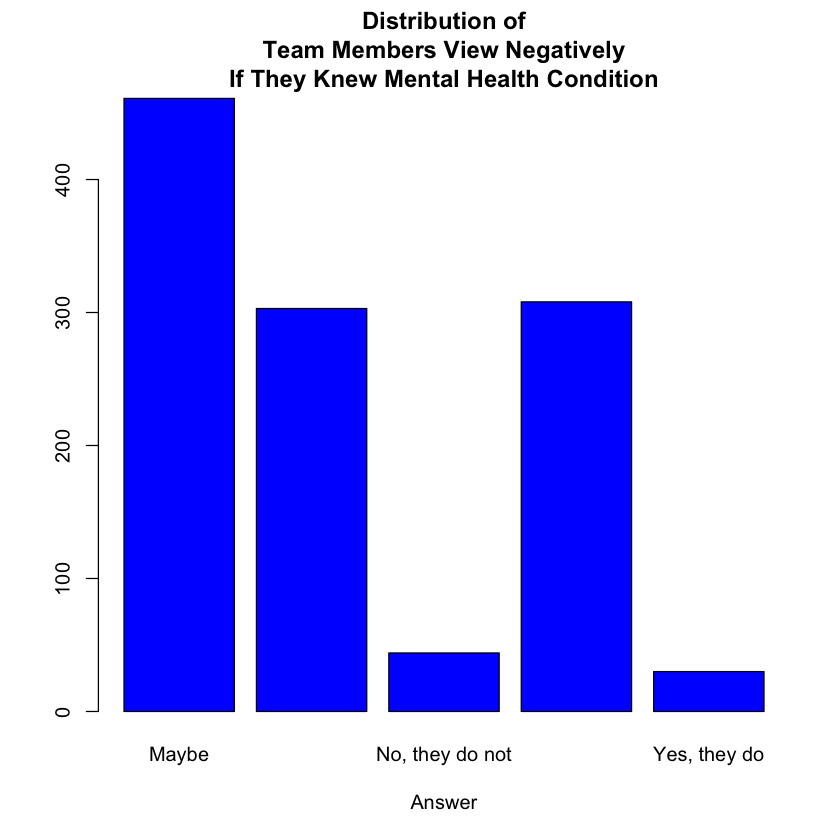

In [29]:
buildBarplot(surveyFrame$Do.you.think.that.team.members.co.workers.would.view.you.more.negatively.if.they.knew.you.suffered.from.a.mental.health.issue.,
             "Team Members View Negatively\nIf They Knew Mental Health Condition")

_Figure 13: Distribution of answers to the question "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?" ._

There is slightly more balance to this than in the previous question, which means that people feel team members are a little bit more sympathetic than an industry's trends as a whole.


    Maybe/Not sure                N/A                 No Yes, I experienced 
               278                 52                491                132 
   Yes, I observed 
               193 


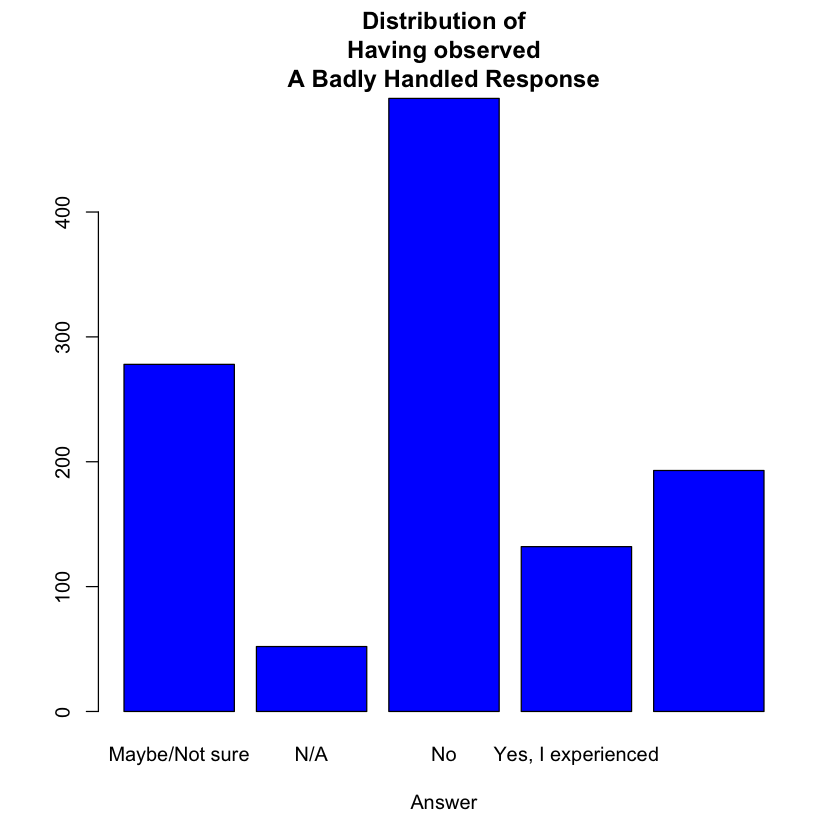

In [35]:
print(table(surveyFrame$Have.you.observed.or.experienced.an.unsupportive.or.badly.handled.response.to.a.mental.health.issue.in.your.current.or.previous.workplace.))
buildBarplot(surveyFrame$Have.you.observed.or.experienced.an.unsupportive.or.badly.handled.response.to.a.mental.health.issue.in.your.current.or.previous.workplace.,
             "Having observed\nA Badly Handled Response")


      Maybe   N/A    No   Yes 
  546   132    89   198   181 


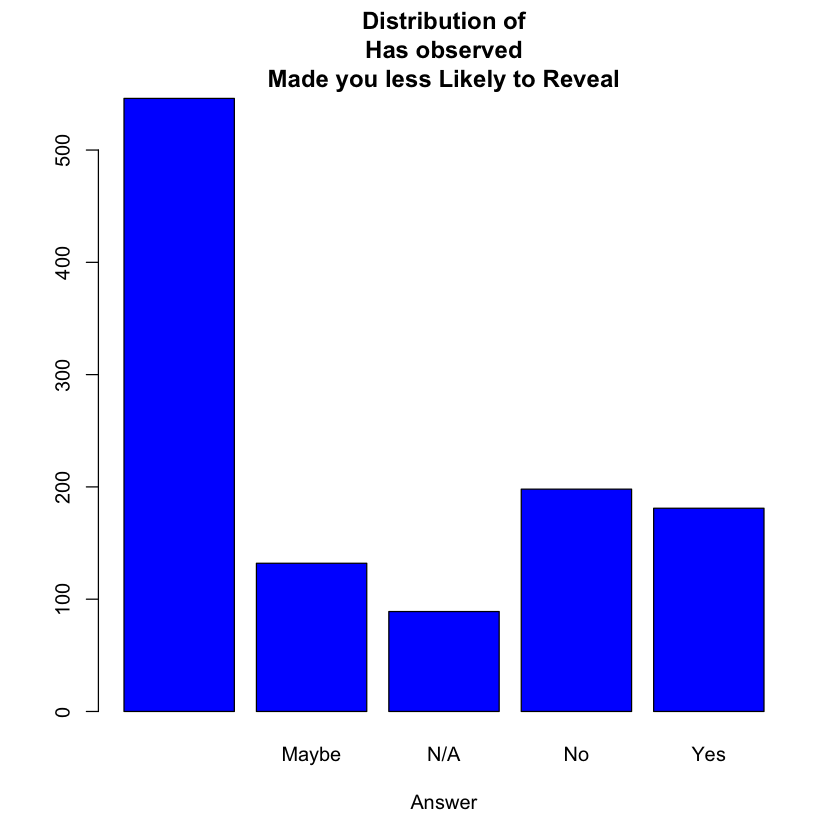

In [37]:
print(table(surveyFrame$Have.your.observations.of.how.another.individual.who.discussed.a.mental.health.disorder.made.you.less.likely.to.reveal.a.mental.health.issue.yourself.in.your.current.workplace.))
buildBarplot(surveyFrame$Have.your.observations.of.how.another.individual.who.discussed.a.mental.health.disorder.made.you.less.likely.to.reveal.a.mental.health.issue.yourself.in.your.current.workplace.,
             "Has observed\nMade you less Likely to Reveal")

## Previous Employment Information